# Syriatel Customer Churn

### Authors

* Tony Bai
* Arthur Kim
* Eddie Lin
* Douglas Lu

## Overview

## Business Problem

## Data Understanding

## Import

In [1]:
#import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reviewing the Data File

In [2]:
#read in the file
df = pd.read_csv('data/syriatel_customer_churn.csv')

In [3]:
#review the first five entires in the dataset
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

We see that the dataset has ~3K rows and 21 columns with no null values.

## Cleaning the Data

After reviewing the dataset, we already see some interesting columns and also certain aspects that need to be modified. The 'churn' column will be our target and because the data type is boolean, we need to converted the values into 0s and 1s. We also see that phone number is already split into the area code and the remaining seven numbers. For this project, we decided that the remaining seven numbers is irrelevant for the project. We also noticed that the column names have spaces, which we will have to replace with underscores.

In [5]:
#convert the target 'churn' to 0s and 1s
df['churn'] = df['churn'].astype(int)

In [6]:
#replace the space in column names with underscores
df.columns = df.columns.str.replace(' ','_')

In [7]:
#drop the phone number column as it is not relevant for our model
df.drop('phone_number', axis=1, inplace=True)

In [8]:
#review the changes made
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


We noticed that some of the numeric columns were similar and can be summed to create new total columns. We created a total domestic minutes, calls, and charge columns that does not include international calls and separate total columns that do include international calls. Charge per minute and the proportion of calls that are international may also play as factors for churn. We also created a customer call satisfaction column by taking the ratio of customer service calls to total calls, so that we can highlight customers who had a high volume of customer service calls relative to their total volume of calls. 

In [9]:
df['total_minutes_dom'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes']

In [10]:
df['total_calls_dom'] = df['total_day_calls'] + df['total_eve_calls'] + df['total_night_calls']

In [11]:
df['total_charge_dom'] = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge']

In [12]:
df['total_minutes'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes'] + df['total_intl_minutes']

In [13]:
df['total_calls'] = df['total_day_calls'] + df['total_eve_calls'] + df['total_night_calls'] + df['total_intl_calls']

In [14]:
df['total_charge'] = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge'] + df['total_intl_charge']

In [15]:
df["charge_per_min_day"] = df['total_day_charge']/df['total_day_calls']

In [16]:
df["charge_per_min_eve"] = df['total_eve_charge']/df['total_eve_calls']

In [17]:
df["charge_per_min_night"] = df['total_night_charge']/df['total_night_calls']

In [18]:
df["charge_per_min_dom"] = df['total_charge_dom']/df['total_calls_dom']

In [19]:
df["charge_per_min_int"] = df['total_intl_charge']/df['total_intl_calls']

In [20]:
df["%_int_min"]= df['total_intl_minutes']/ df['total_minutes']*100

In [21]:
df['call_satisfaction'] = df['customer_service_calls']/df['total_calls']*100

In [22]:
#review the changes made
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_minutes,total_calls,total_charge,charge_per_min_day,charge_per_min_eve,charge_per_min_night,charge_per_min_dom,charge_per_min_int,%_int_min,call_satisfaction
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,...,717.2,303,75.56,0.409727,0.169495,0.120989,0.242867,0.900000,1.394311,0.330033
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,...,625.2,332,59.24,0.223333,0.161359,0.111165,0.168815,1.233333,2.191299,0.301205
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,...,539.4,333,62.29,0.362982,0.093636,0.070385,0.179878,0.658000,2.261772,0.000000
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,...,564.8,255,66.80,0.716901,0.059773,0.099551,0.262177,0.254286,1.168555,0.784314
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,...,512.0,359,52.09,0.250796,0.103361,0.069504,0.138652,0.910000,1.972656,0.835655


In [23]:
#check if there are any nulls in the new columns we made
df.isnull().sum()

state                      0
account_length             0
area_code                  0
international_plan         0
voice_mail_plan            0
number_vmail_messages      0
total_day_minutes          0
total_day_calls            0
total_day_charge           0
total_eve_minutes          0
total_eve_calls            0
total_eve_charge           0
total_night_minutes        0
total_night_calls          0
total_night_charge         0
total_intl_minutes         0
total_intl_calls           0
total_intl_charge          0
customer_service_calls     0
churn                      0
total_minutes_dom          0
total_calls_dom            0
total_charge_dom           0
total_minutes              0
total_calls                0
total_charge               0
charge_per_min_day         2
charge_per_min_eve         1
charge_per_min_night       0
charge_per_min_dom         0
charge_per_min_int        18
%_int_min                  0
call_satisfaction          0
dtype: int64

In [24]:
#we see that there are nulls in some of the charge_per_min columns, which are most likely due
#to dividing by 0, so we just fillna with 0
df['charge_per_min_int'].fillna(0, inplace=True)
df['charge_per_min_day'].fillna(0, inplace=True)
df['charge_per_min_eve'].fillna(0, inplace=True)

Thinking ahead of when we need to split out our categorical features, we decided to categorize the 'state' column into regions to see if we can identify regions with high churn.

In [25]:
#determine how many states are included in the file
df['state'].nunique()

51

In [26]:
#create a dictionary to match State with region
states = {
        'AK': 'West',
        'AL': 'South',
        'AR': 'South',
        'AZ': 'West',
        'CA': 'West',
        'CO': 'West',
        'CT': 'Northeast',
        'DC': 'South',
        'DE': 'South',
        'FL': 'South',
        'GA': 'South',
        'HI': 'West',
        'IA': 'Midwest',
        'ID': 'West',
        'IL': 'Midwest',
        'IN': 'Midwest',
        'KS': 'Midwest',
        'KY': 'South',
        'LA': 'South',
        'MA': 'Northeast',
        'MD': 'South',
        'ME': 'Northeast',
        'MI': 'Midwest',
        'MN': 'Midwest',
        'MO': 'Midwest',
        'MS': 'South',
        'MT': 'West',
        'NC': 'South',
        'ND': 'Midwest',
        'NE': 'Midwest',
        'NH': 'Northeast',
        'NJ': 'Northeast',
        'NM': 'West',
        'NV': 'West',
        'NY': 'Northeast',
        'OH': 'Midwest',
        'OK': 'South',
        'OR': 'West',
        'PA': 'Northeast',
        'RI': 'Northeast',
        'SC': 'South',
        'SD': 'Midwest',
        'TN': 'South',
        'TX': 'South',
        'UT': 'West',
        'VA': 'South',
        'VT': 'Northeast',
        'WA': 'West',
        'WI': 'Midwest',
        'WV': 'South',
        'WY': 'West'
}

In [27]:
#create a new column for region
df['region'] = df['state'].replace(states)


In [28]:
#review the data again
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_calls,total_charge,charge_per_min_day,charge_per_min_eve,charge_per_min_night,charge_per_min_dom,charge_per_min_int,%_int_min,call_satisfaction,region
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,...,303,75.56,0.409727,0.169495,0.120989,0.242867,0.900000,1.394311,0.330033,Midwest
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,...,332,59.24,0.223333,0.161359,0.111165,0.168815,1.233333,2.191299,0.301205,Midwest
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,...,333,62.29,0.362982,0.093636,0.070385,0.179878,0.658000,2.261772,0.000000,Northeast
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,...,255,66.80,0.716901,0.059773,0.099551,0.262177,0.254286,1.168555,0.784314,Midwest
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,...,359,52.09,0.250796,0.103361,0.069504,0.138652,0.910000,1.972656,0.835655,South


In [29]:
#export the the dataframes (one with State column, one without State column) to csv
df.to_csv("data/syrialtel_cleaned_data.csv" , index = False)

## Functions

In [30]:
def box_plot_continuous(df_cont, target, feature):
    '''
    create a boxplot for the feature by the target classification
    '''
    fig, ax = plt.subplots()
    sns.boxplot(x=df_cont[target], y=df_cont[feature],ax=ax);
    
    #set labels for axes, and the x and y tick size
    feature_label = feature.replace('_', ' ').title()
    ax.set_ylabel(feature_label, fontsize=18)
    ax.set_xlabel("")
    ax.set_xticklabels(['No Churn', 'Churn'])
    plt.xticks(size = 18)
    plt.yticks(size = 14)
    
    return ax

In [31]:
def stacked_bar_categorical(df_cat, target, feature):
    '''
    creates a stacked bar graph between the target (churn) and 
    a selected categorical feature
    '''
    #create a new dataframe for the target and the feature of choice
    new_df = df_cat[[feature, target]]

    #create a stacked dataframe grouped by state and churn
    df_stacked = (new_df.groupby([feature, target])[feature].count()/new_df.groupby([feature])[feature].count())

    #unstack the dataframe
    df_unstacked = df_stacked.unstack()

    #multiply the proportions by 100 to get a percentage
    df_unstacked[0] = df_unstacked[0]*100
    df_unstacked[1] = df_unstacked[1]*100

    #rename the columns for 0 = no churn and 1 = churn
    df_unstacked.rename(columns={0:'No Churn', 1:"Churn"}, inplace=True)

    #create figure and ax
    fig, ax = plt.subplots(figsize=(15, 10))
    fig.tight_layout()

    #sort the data by highest churn percentage and blot a stacked bar for top 10 states
    df_unstacked.sort_values(by="Churn", ascending=False).head(10).plot.bar(stacked=True, ax=ax);

    #set labels for axes, and the x and y tick size
    ax.set_ylabel("Percent", fontsize=18)
    feature_label = feature.replace('_', ' ').title()
    ax.set_xlabel(feature_label, fontsize=18)
    plt.xticks(size = 14)
    plt.yticks(size = 14)
    
    #reverse the legend labels so that it matches with the bar graphs
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.01, 1), loc='upper left', prop={'size': 14})

    #add in the labels for each segment in the stacked bar
    for rect in ax.patches:
        height = rect.get_height()
        width = rect.get_width()
        x = rect.get_x()
        y = rect.get_y()

        #height of the bar is also the value of the bar
        label_text = round(height,1)

        #add in the label of the text in the middle of the bar
        label_x = x + width / 2
        label_y = y + height / 2
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize = 14)
        
    return ax

## Exploratory Data Analysis (EDA)

In the exploratory data analysis (EDA) portion, we explored the target (churn) and the features included in the dataset. We first plot the distribution of all features and churn in our model.

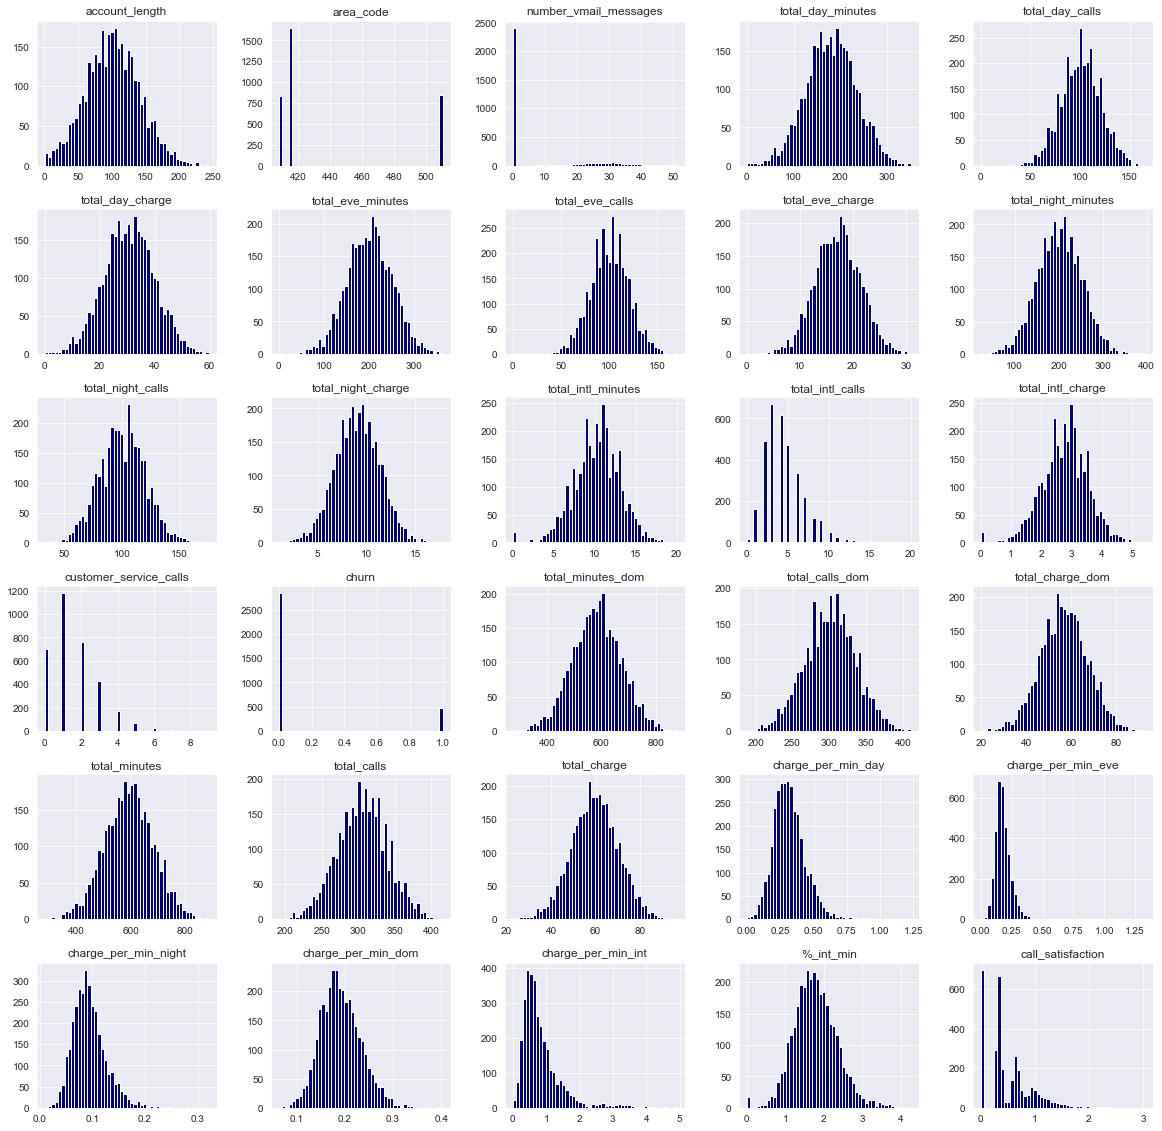

In [32]:
#plot histogram of all features and target in dataset
sns.set_style('dark')
df.hist(bins=50,figsize=(20,20),color='navy');

We then split the continuous and categorical features so that we can analyze them against churn separately.

In [33]:
#create new dataframes with just continuous or categorical features and the target
df_cont = df.select_dtypes(include=np.number).drop('area_code', axis=1)
df_cat = df[['churn', 'area_code', 'international_plan', 'voice_mail_plan', 'state', 'region']]

### Continuous Features

In [34]:
#review the dataframe with continuous features
df_cont.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   number_vmail_messages   3333 non-null   int64  
 2   total_day_minutes       3333 non-null   float64
 3   total_day_calls         3333 non-null   int64  
 4   total_day_charge        3333 non-null   float64
 5   total_eve_minutes       3333 non-null   float64
 6   total_eve_calls         3333 non-null   int64  
 7   total_eve_charge        3333 non-null   float64
 8   total_night_minutes     3333 non-null   float64
 9   total_night_calls       3333 non-null   int64  
 10  total_night_charge      3333 non-null   float64
 11  total_intl_minutes      3333 non-null   float64
 12  total_intl_calls        3333 non-null   int64  
 13  total_intl_charge       3333 non-null   float64
 14  customer_service_calls  3333 non-null   

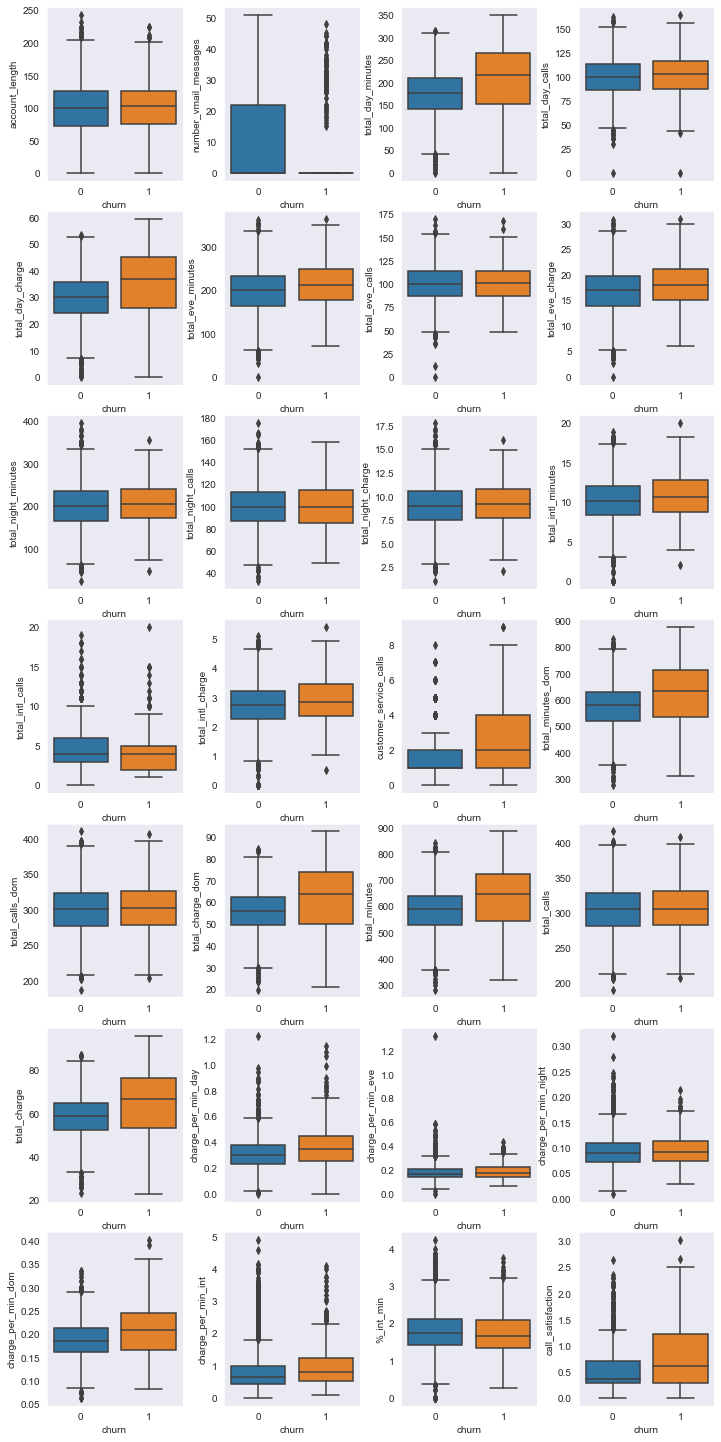

In [35]:
#plot out boxplots for each continuous features vs the target (churn) to see if any
#continuous features stand out in terms of difference between churn and no churn
fig, ax = plt.subplots(7, 4, figsize=(10, 20))
fig.tight_layout()
for feature, subplot in zip(df_cont.drop('churn', axis=1).columns, ax.flatten()):
    sns.boxplot(x=df_cont['churn'], y=df_cont[feature],ax=subplot);

From the graphs above, we see some of the features where there is a noticeable difference between customers who churned vs those who did not churn. Some of the features include:
* total_day_minutes
* total_day_charge
* customer_service_calls
* total_minutes_dom
* total_charge_dom
* total_minutes
* charge_per_min_day
* charge_per_min_

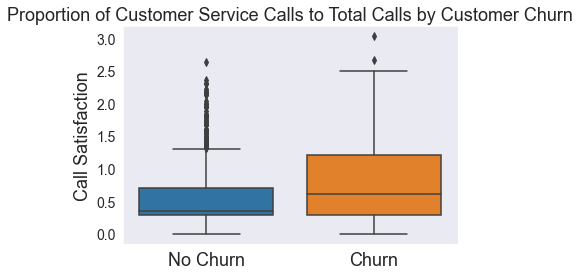

In [36]:
ax = box_plot_continuous(df_cont, 'churn', 'call_satisfaction')
ax.set_title("Proportion of Customer Service Calls to Total Calls by Customer Churn", fontsize=18);

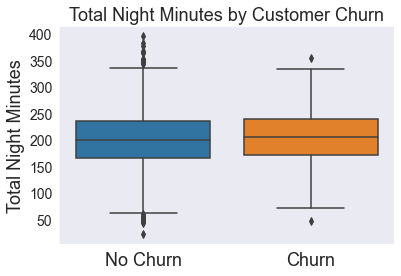

In [44]:
ax = box_plot_continuous(df_cont, 'churn', 'total_night_minutes')
ax.set_title("Total Night Minutes by Customer Churn", fontsize=18);

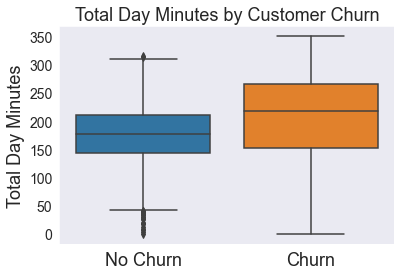

In [37]:
ax = box_plot_continuous(df_cont, 'churn', 'total_day_minutes')
ax.set_title("Total Day Minutes by Customer Churn", fontsize=18);

array([[<AxesSubplot:title={'center':'churn'}>,
        <AxesSubplot:title={'center':'total_day_minutes'}>],
       [<AxesSubplot:title={'center':'charge_per_min_day'}>,
        <AxesSubplot:>]], dtype=object)

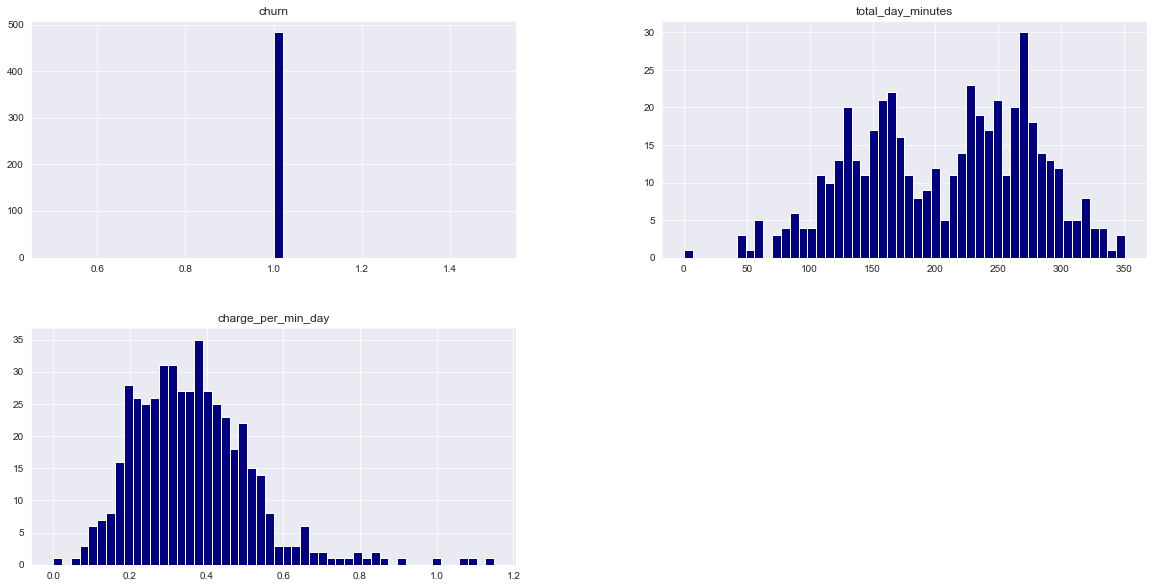

In [50]:
new_df = df[df['churn'] == 1]
new_df = new_df[['churn', 'total_day_minutes', 'charge_per_min_day']]
#plot histogram of all features and target in dataset
sns.set_style('dark')
new_df.hist(bins=50,figsize=(20,10),color='navy')

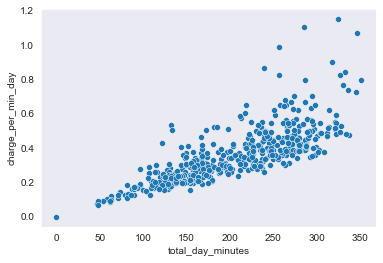

In [53]:
new_df = df[df['churn'] == 1]
new_df = new_df[['churn', 'total_day_minutes', 'charge_per_min_day']]
#plot histogram of all features and target in dataset
sns.set_style('dark')
sns.scatterplot(x=new_df['total_day_minutes'], y=new_df['charge_per_min_day']);

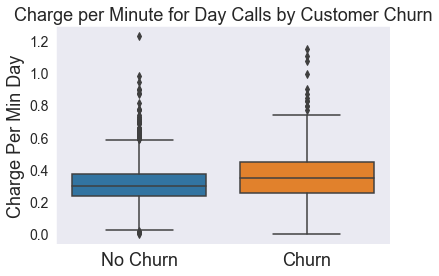

In [46]:
ax = box_plot_continuous(df_cont, 'churn', 'charge_per_min_day')
ax.set_title("Charge per Minute for Day Calls by Customer Churn", fontsize=18);

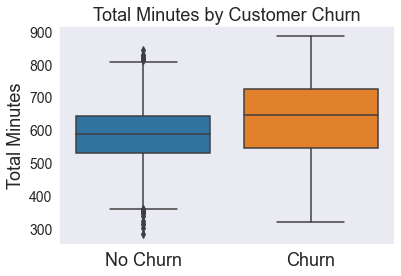

In [45]:
ax = box_plot_continuous(df_cont, 'churn', 'total_minutes')
ax.set_title("Total Minutes by Customer Churn", fontsize=18);

### Categorical Features

In [38]:
#review the dataframe with categorical features
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   churn               3333 non-null   int64 
 1   area_code           3333 non-null   int64 
 2   international_plan  3333 non-null   object
 3   voice_mail_plan     3333 non-null   object
 4   state               3333 non-null   object
 5   region              3333 non-null   object
dtypes: int64(2), object(4)
memory usage: 156.4+ KB


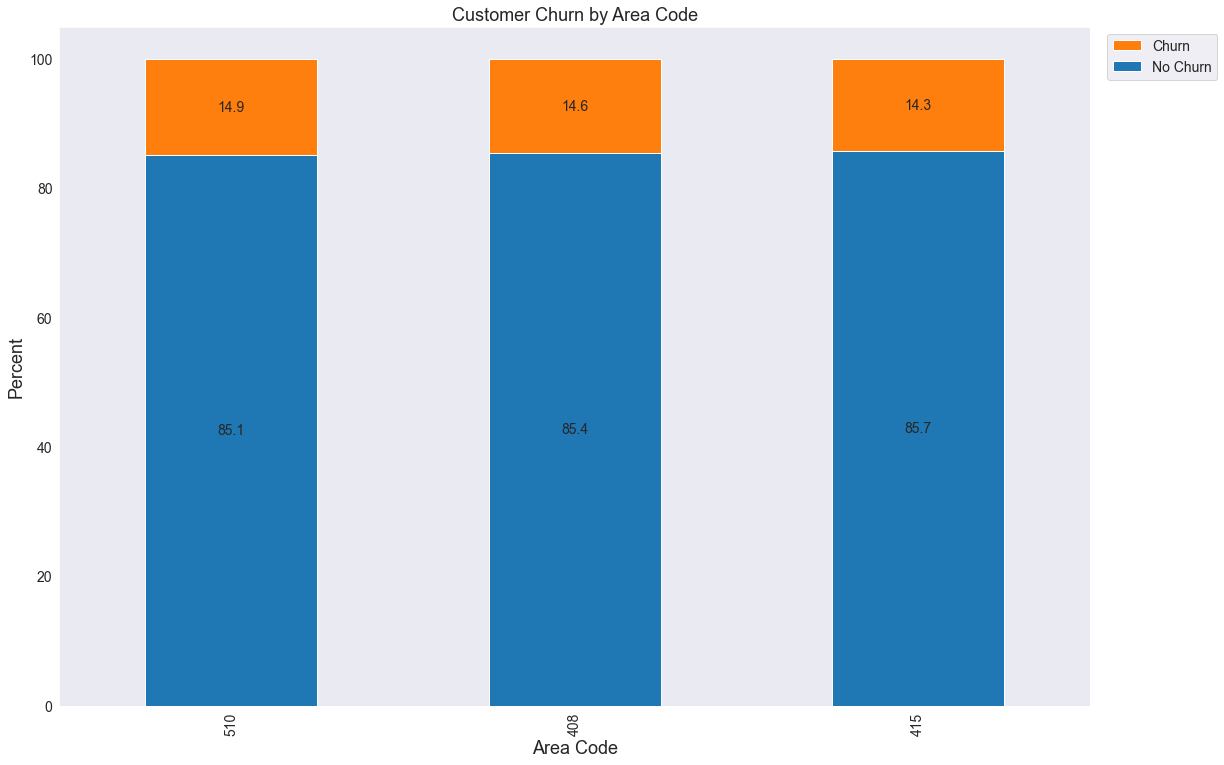

In [39]:
ax = stacked_bar_categorical(df_cat, 'churn', 'area_code')
ax.set_title("Customer Churn by Area Code", fontsize=18);

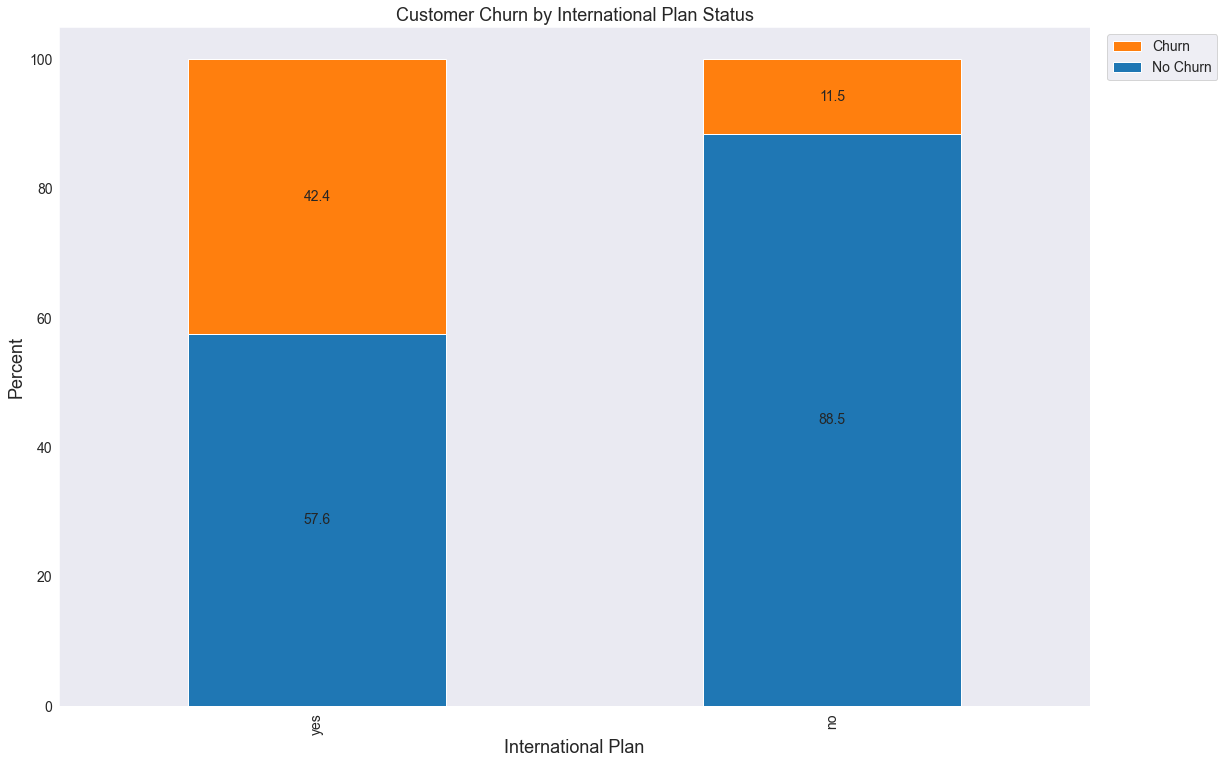

In [40]:
ax = stacked_bar_categorical(df_cat, 'churn', 'international_plan')
ax.set_title("Customer Churn by International Plan Status", fontsize=18);

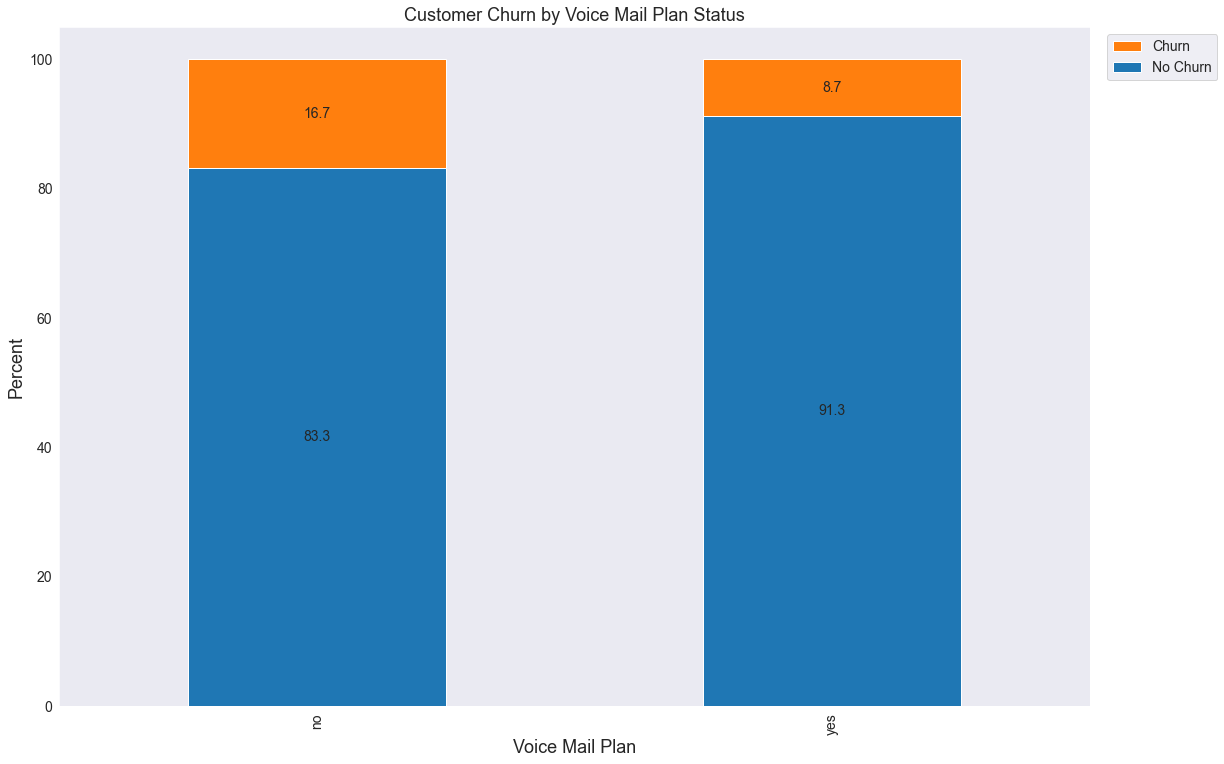

In [41]:
ax = stacked_bar_categorical(df_cat, 'churn', 'voice_mail_plan')
ax.set_title("Customer Churn by Voice Mail Plan Status", fontsize=18);

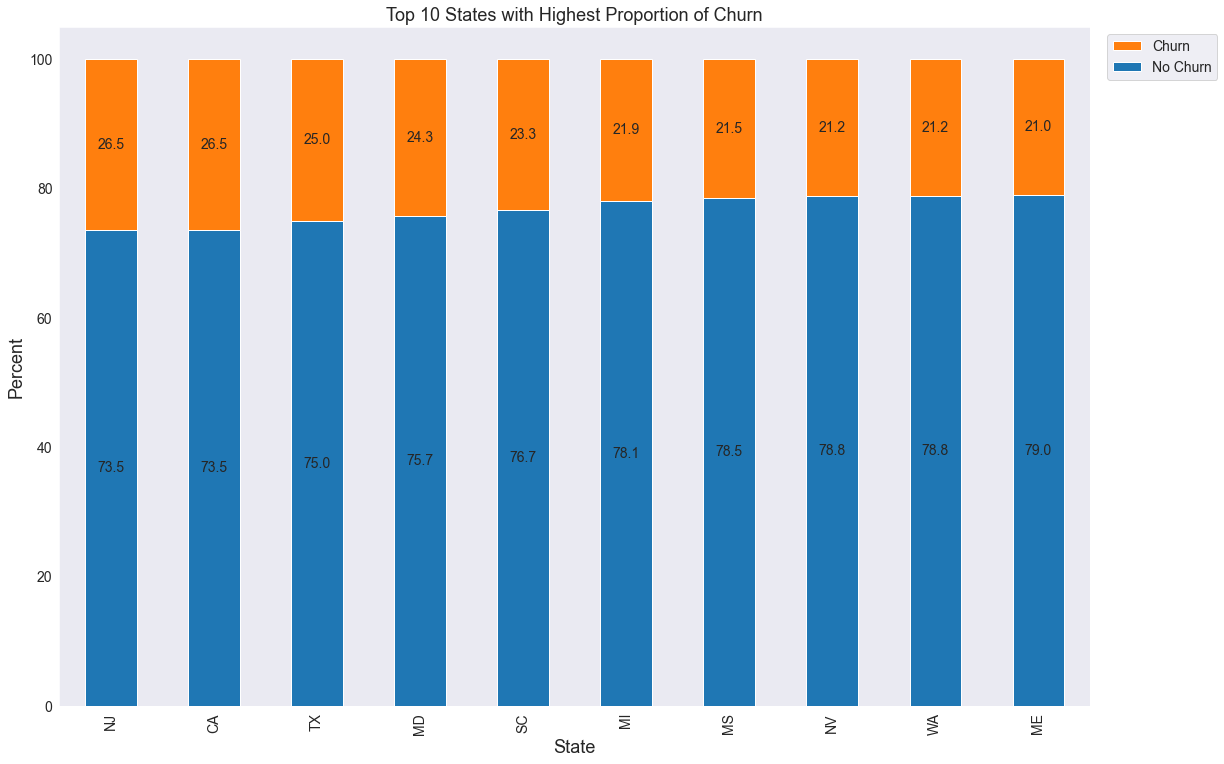

In [42]:
ax = stacked_bar_categorical(df_cat, 'churn', 'state')
ax.set_title("Top 10 States with Highest Proportion of Churn", fontsize=18);

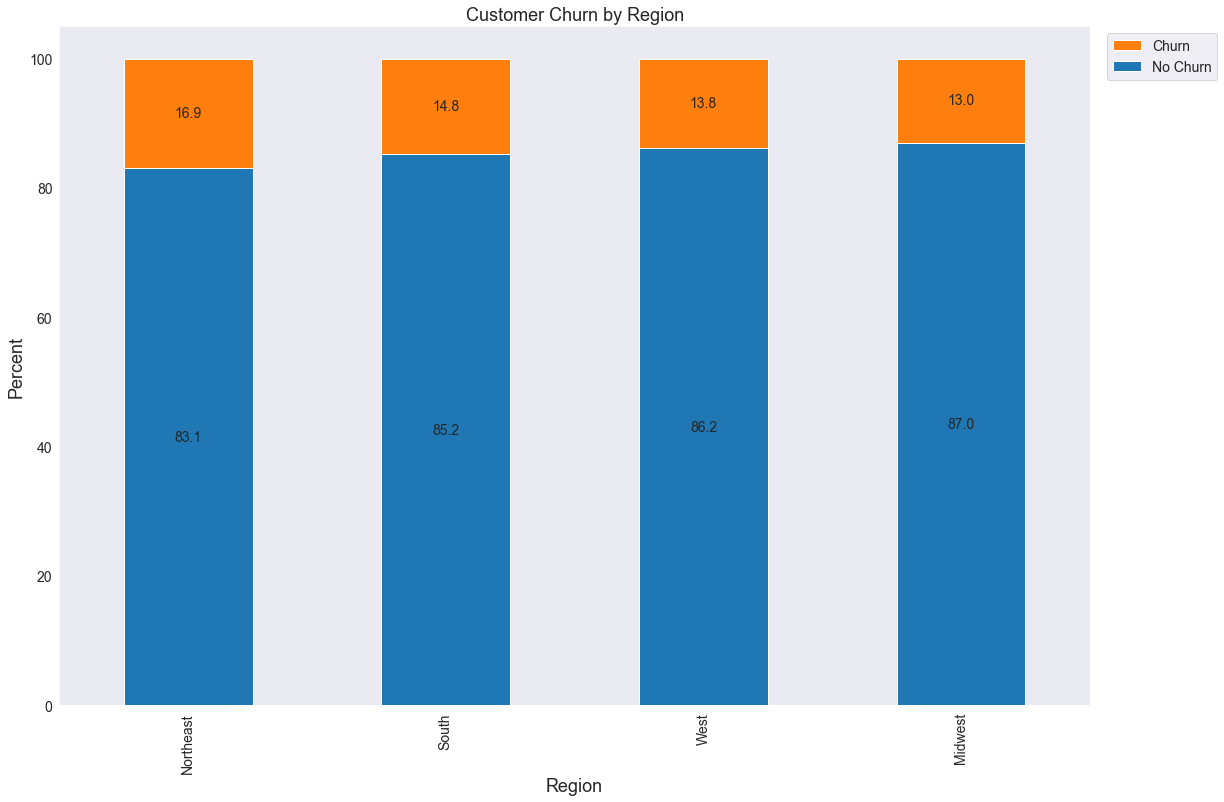

In [43]:
ax = stacked_bar_categorical(df_cat, 'churn', 'region')
ax.set_title("Customer Churn by Region", fontsize=18);